In [2]:
import pandas as pd
youtube_df = pd.read_csv("youtoxic_english_1000.csv")
toxic_df = pd.read_csv("C:/Users/MSI/Downloads/jigsaw-toxic-comment-classification-challenge/train.csv.zip")

In [3]:
youtube_df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
youtube_df.shape

(1000, 15)

In [5]:
toxic_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
toxic_df.shape

(159571, 8)

In [7]:
#We are going to select just the "comment_text" and "toxic" columns
toxic_df['Toxic'] = toxic_df.iloc[:, 2:].any(axis = 1)
selected_toxic_columns = toxic_df[['comment_text', 'Toxic']]
selected_toxic_columns

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159566,""":::::And for the second time of asking, when ...",False
159567,You should be ashamed of yourself \n\nThat is ...,False
159568,"Spitzer \n\nUmm, theres no actual article for ...",False
159569,And it looks like it was actually you who put ...,False


In [8]:
#We are going to select just the "Text" and "IsToxic" columns
youtube_df['Toxic'] = youtube_df.iloc[:, 3:].any(axis = 1)
selected_youtube_columns = youtube_df[['Text', 'Toxic']].rename(
    columns = {
        'Text' : 'comment_text'
    }
)
selected_youtube_columns

,comment_text,Toxic
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
995,I remember that they sent in the national defe...,False
996,Stats don`t represent the problem. Race baitin...,True
997,The quote from the mother... Wow that hit hard...,False
998,this video is so racist,False


In [9]:
#Let's combine the two DataFrames
combined_df = pd.concat([selected_toxic_columns, selected_youtube_columns], ignore_index = True)
combined_df.head()

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False


In [10]:
combined_df.shape

(160571, 2)

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160571 entries, 0 to 160570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  160571 non-null  object
 1   Toxic         160571 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.4+ MB


In [12]:
combined_df.describe()

,comment_text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [13]:
combined_df.isnull().sum()

comment_text    0
Toxic           0
dtype: int64

In [14]:
#Checking duplicates
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

np.int64(5)

In [15]:
#Printing the duplicated rows
duplicates = combined_df[combined_df.duplicated(subset = ['comment_text'], keep = False)]
duplicates

,comment_text,Toxic
160163,RUN THEM OVER,True
160213,run them over,True
160228,run them over,True
160248,run them over,True
160270,RUN THEM OVER,True


In [16]:
#Dropping Duplicates
combined_df.drop_duplicates(subset = ['comment_text'], keep = 'first', inplace = True)

In [17]:
#Confirm Drops
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

np.int64(0)

In [18]:
combined_df['Toxic'].value_counts()

Toxic
False    143884
True      16684
Name: count, dtype: int64

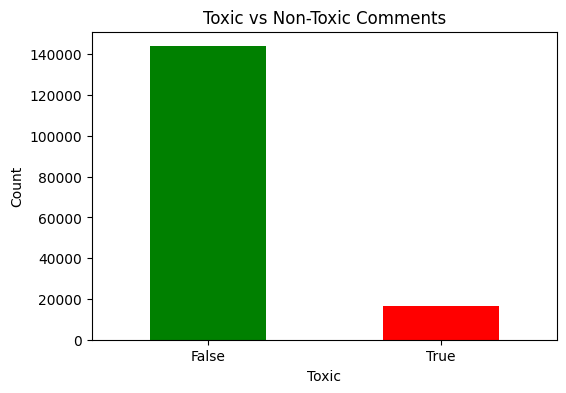

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
#Graphical representation of the Toxic column values (Toxic vs Non-Toxic Comments) distribution
plt.figure(figsize = (6, 4))
toxic_counts = combined_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

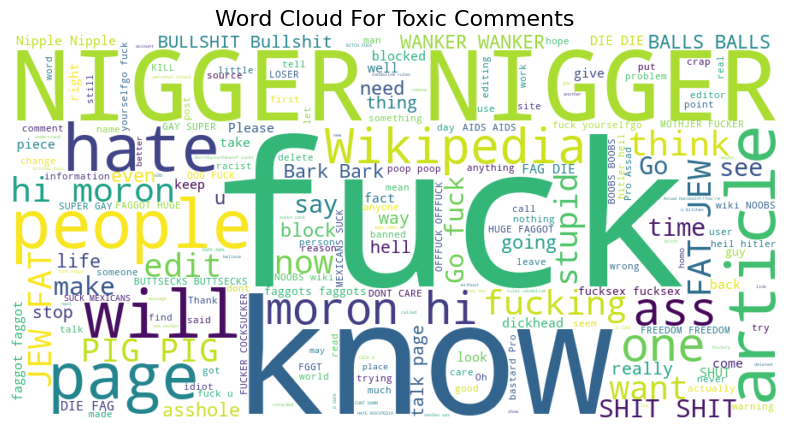

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the dataframe exists and is correctly structured
# Creating a Word Cloud of Toxic Comments
toxic_comments = ''.join(combined_df[combined_df['Toxic'] == True]['comment_text'])
toxic_words = WordCloud(width=900, height=450, background_color="white").generate(toxic_comments)

# Plot the word cloud
plt.figure(figsize=(10, 5))  # Optional: Adjust the figure size for better visualization
plt.imshow(toxic_words, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud For Toxic Comments", fontsize=16)  # Adjust the font size for better readability
plt.show()


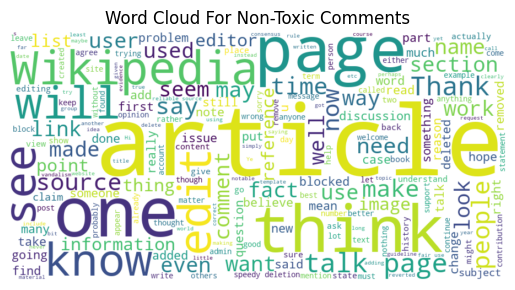

In [22]:
#Creating Word Cloud of Non-Toxic Comments
non_toxic_comments = ''.join(combined_df[~combined_df['Toxic']]['comment_text'])
non_toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(non_toxic_comments)
plt.imshow(non_toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("Word Cloud For Non-Toxic Comments")
plt.show()

In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Replacing True as 1 and False as 0. 
combined_df['Toxic'] = combined_df['Toxic'].replace({True: 1, False: 0})

In [24]:
#"re" is for regular expressions and text processing.
import re
#Cleaning the comment texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re'", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")
    
    return text

combined_df['comment_text'] = combined_df['comment_text'].map(lambda cleaned : clean_text(cleaned))

In [25]:
combined_df.head()

,comment_text,Toxic
0,explanation why the edits made under my userna...,0
1,d aww he matches this background colour i am s...,0
2,hey man i am really not trying to edit war it ...,0
3,more i cannot make any real suggestions on imp...,0
4,you sir are my hero any chance you remember wh...,0


In [27]:
"""TF-IDF(Term Frequency-Inverse Document Frequency) is used for text analysis: 
Text to Numerical Conversion, Feature Extraction, Dimensionality Reduction, Normalization & Scaling etc."""

from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000, stop_words = 'english')
X = vector.fit_transform(combined_df['comment_text'])
Y = combined_df['Toxic']

In [28]:
combined_df['Toxic'].value_counts()

Toxic
0    143884
1     16684
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
#Initialize SMOTE
smote = SMOTE()

#Using SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

#Converting oversampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled.todense(), columns = vector.get_feature_names_out())
resampled_df['Toxic'] = y_resampled

In [34]:
from sklearn.model_selection import train_test_split
#Splitting the New Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

In [35]:
import numpy as np
print(np.__version__)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#Neural Network Model
model = Sequential([
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

2.2.2


In [38]:
train_model = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

Epoch 1/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8928 - loss: 0.3012 - val_accuracy: 0.9332 - val_loss: 0.1772
Epoch 2/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9397 - loss: 0.1628 - val_accuracy: 0.9450 - val_loss: 0.1492
Epoch 3/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9540 - loss: 0.1310 - val_accuracy: 0.9560 - val_loss: 0.1283
Epoch 4/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9643 - loss: 0.1074 - val_accuracy: 0.9624 - val_loss: 0.1125
Epoch 5/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9707 - loss: 0.0899 - val_accuracy: 0.9668 - val_loss: 0.1018
Epoch 6/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9752 - loss: 0.0778 - val_accuracy: 0.9690 - val_loss: 0.0937
Epoch 7/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9774 - loss: 0.0699 - val_accuracy: 0.9714 - val_loss: 0.0887
Epoch 8/10
5756/5756 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9801 - loss: 0

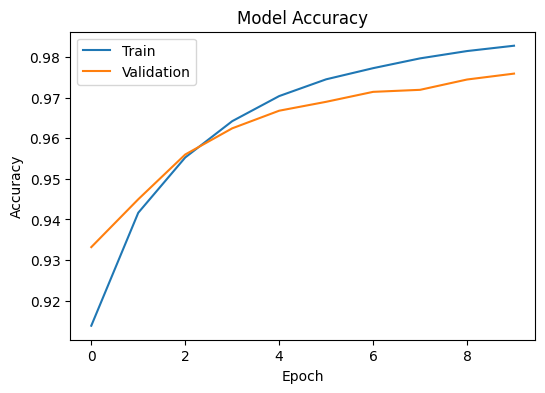

In [39]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

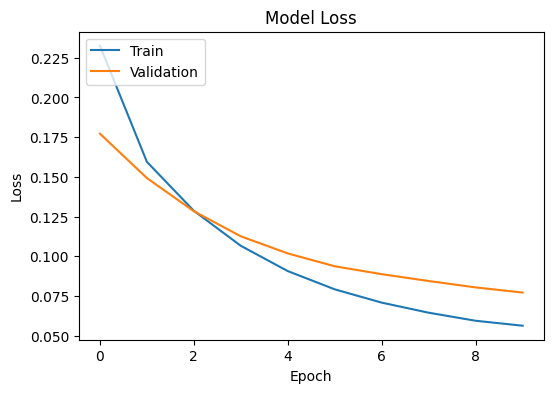

In [40]:
#Training vs Validation Loss
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

In [41]:
"""Let's ensure that the model is not overfitting."""

loss, accuracy = model.evaluate(X_test, y_test)
print(f"The Test Accuracy is: {accuracy}")

1799/1799 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9755 - loss: 0.0801
The Test Accuracy is: 0.975362241268158


In [42]:
print(f"The Model Loss is: {loss}")

The Model Loss is: 0.0799025371670723


In [43]:
from sklearn.metrics import classification_report

#Predictions on Test Data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

1799/1799 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     28665
           1       0.97      0.99      0.98     28889

    accuracy                           0.98     57554
   macro avg       0.98      0.98      0.98     57554
weighted avg       0.98      0.98      0.98     57554



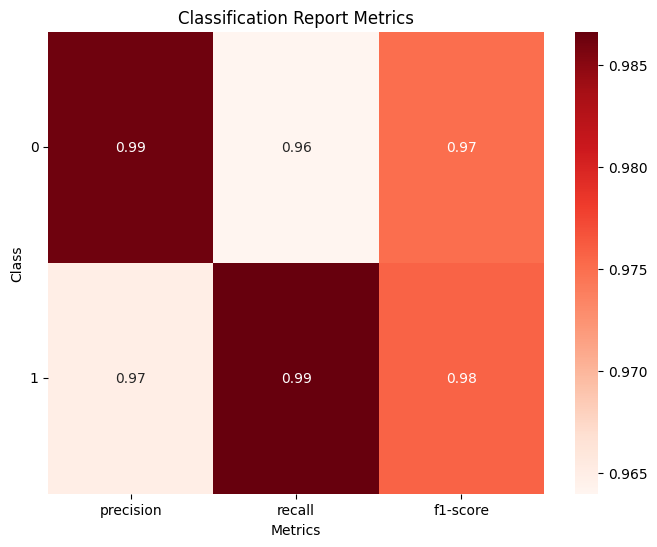

In [45]:
import seaborn as sns

#Predictions on Test Data
#y_pred_prob = model.predict(X_test)
#y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred, output_dict = True)
class_report_df = pd.DataFrame(class_report).transpose()

#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

In [46]:
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vector, f)

model.save('toxic_comment_prediction_model.h5')

In [48]:
import pickle
from tensorflow.keras.models import load_model
#Import TF-IDF Vectorizer for text handling
from sklearn.feature_extraction.text import TfidfVectorizer

#Loading TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
    
    
#Loading The Trained Model
loaded_model = load_model('toxic_comment_prediction_model.h5')
new_comments = [
    "You're quite a bad person at keeping to time.",
    "This is a very bad service.",
    "You’ve achieved so much!",
    "You are very stupid and mad.",
]

#Processing New Comments using the Loaded TF-IDF Vectorizer
processed_comment = loaded_vectorizer.transform(new_comments)

#Predicting using the Loaded Model
predictions = (loaded_model.predict(processed_comment) > 0.5).astype(int)

#Prediction Result
for comment, prediction in zip(new_comments, predictions):
    print(f"Comment: {comment} | Is Toxic: {bool(prediction)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Comment: You're quite a bad person at keeping to time. | Is Toxic: False
Comment: This is a very bad service. | Is Toxic: False
Comment: You’ve achieved so much! | Is Toxic: False
Comment: You are very stupid and mad. | Is Toxic: True
